# Curso de Optimización (DEMAT)
## Tarea 7
## Leslie Janeth Quincosa Ramírez

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Marzo 19, 2022**   |
| Fecha límite de entrega de la tarea: | **Marzo 27, 2022**   |


### Indicaciones

- Envie el notebook que contenga los códigos y las pruebas realizadas de cada ejercicio.
- Si se requiren algunos scripts adicionales para poder reproducir las pruebas,
  agreguelos en un ZIP junto con el notebook.
- Genere un PDF del notebook y envielo por separado.


---

## Ejercicio 1 (5 puntos)

Programar el método de Gauss-Newton para resolver el problema de mínimos cuadrados no lineales

$$ \min_x  f(z) = \frac{1}{2} \sum_{j=1}^m r_j^2(z), $$
       
donde $r_j: \mathbb{R}^n \rightarrow \mathbb{R}$ para $j=1,...,m$.
Si definimos la función $R: \mathbb{R}^n \rightarrow \mathbb{R}^m$ como

$$ R(z) = \left( \begin{array}{c}
            r_{1}(z) \\
            \vdots \\
            r_{m}(z) \\
        \end{array} \right),
$$

entonces

$$ min_z  f(z) = \frac{1}{2} R(z)^\top R(z). $$

---

Dar la función de residuales $R(z)$,
la función Jacobiana $J(z)$, un  punto inicial $z_0$, un número máximo de 
iteraciones $N$, y una tolerancia $\tau>0$.

1. Hacer $res=0$.

2. Para $k = 0, 1, ..., N$:

- Calcular $R_k = R(z_k)$
- Calcular $J_{k} = J(z_k)$
- Calcular la dirección de descenso $p_k$ resolviendo el sistema

$$  J_{k}^\top J_{k} p_k = -J_{k}^\top R_{k} $$

- Si $\|p_k\|<\tau$, hacer $res=1$ y terminar el ciclo
- Hacer $z_{k+1} = z_k +  p_k$.

3. Devolver $z_k, R_k,  k, \|p_k\|$ y $res$.

---

1. Escriba una función que implementa el algoritmo anterior 
   usando arreglos de Numpy. 
   
2. Leer el archivo **puntos2D_1.npy**
   que contiene una matriz con dos columnas. 
   La primer columna tiene los valores $x_1, x_2, ..., x_m$ y en la segunda
   columna los valores $y_1, y_2, ..., y_m$, de modo que cada par 
   $(x_i, y_i)$ es un dato. 
   Queremos ajustar al conjunto de puntos $(x_i, y_i)$ el modelo 
   
   $$  A \sin(w x + \phi)$$
   
   por lo que la función $R(\mathbf{z})=R(A, w, \phi)$ 
   está formada por los residuales 
   
   $$ r_i(z) = r_i(A, w, \phi) = A \sin(w x_i + \phi) - y_i $$
   
   para $i=1,2,...,m$.
   
   Programe la función $R(\mathbf{z})$ con $\mathbf{z} = (A, w, \phi)$ 
   y su Jacobiana $J(\mathbf{z})$.
   
   **Nota:** Puede programar estas funciones de la forma ``funcion(z, paramf)``,
   donde ``paramf`` corresponda a la matriz que tiene los puntos $(x_i,y_i)$.
   También puede pasar el arreglo ``paramf`` como arumento del algoritmo para
   que pueda evaluar las funciones.
   
3. Use el algoritmo con estas funciones $R(\mathbf{z})$ y $J(\mathbf{z})$, el punto inicial 
   $\mathbf{z}_0  = (15, 0.6, 0)$ (esto es $A_0=15$, $w_0=0.6$ y $\phi_0=0$), un número
   máximo de iteraciones $N=5000$ y una tolerancia $\tau =\sqrt{\epsilon_m}$
   donde $\epsilon_m$ es el épsilon máquina.

* Imprima el valor inicial $f(\mathbf{z}_0) =  \frac{1}{2} R(\mathbf{z}_0)^\top R(\mathbf{z}_0)$.
* Ejecute el algoritmo e imprima un mensaje que indique si el algoritmo 
  converge dependiendo de la variable $res$.
* Imprima $\mathbf{z}_k$, $f(\mathbf{z}_k) =  \frac{1}{2} R(\mathbf{z}_k)^\top R(\mathbf{z}_k)$,
  la norma $\|p_k\|$, y el número de iteraciones $k$ realizadas.

4. Genere una gráfica que muestre a los puntos $(x_i, y_i)$ y la
   gráfica del modelo  $z_k[0] \sin(z_k[1] x + z_k[2])$, evaluando
   esta función en el intervalo
   
$$x \in [\min x_i, \max x_i]$$

5. De la gr\'afica de los datos, e interpretando el parámetro $A$ como la amplitud
   de la onda, se ve que  $A_0=15$ es una buena inicialización para este paramétro.
   Para los otros parámetros también debe se debería usar su interpretación para dar 
   buenos valores iniciales. Repita las pruebas con los puntos iniciales
   $\mathbf{z}_0  = (15, 1, 0)$  y $\mathbf{z}_0  = (15, 0.6, 1.6)$.

### Solución:

In [99]:
# En esta celda puede poner el código de las funciones
# o poner la instrucción para importarlas de un archivo .py
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigvals
import sys
import matplotlib.pyplot as plt
import numpy as np

def GaussNewton(R, J, z0, paramf, N, tol):
    res = 0
    zk = z0
    for k in range(N):
        Rk = R(zk, paramf)
        Jk = J(zk, paramf)
        pk = np.linalg.solve(Jk.T@Jk, -Jk.T@Rk) #J⊤kJkpk=−J⊤kRk
        norm = LA.norm(pk)
        if norm < tol:
            res = 1
            break
        else:
            zk = zk + pk
            if k+1 >= N:
                res = 0
                break
    return zk, Rk, k, norm, res

In [100]:
# Pruebas del algoritmo
def R(z, paramf):
    A = z[0]
    w = z[1]
    theta = z[2]
    return A*np.sin(w*paramf.T[0]+ theta) - paramf.T[1]

def J(z, paramf):
    A = z[0]
    w = z[1]
    theta = z[2]
    A1 = np.sin(w*paramf.T[0]+ theta)
    B1 = A*np.cos(w*paramf.T[0]+ theta)*paramf.T[0]
    C1 = A*np.cos(w*paramf.T[0]+ theta)
    return np.c_[A1, B1, C1]#np.sin(w*paramf.T[0]+ theta)] #A*np.cos(w*paramf.T[0]+ theta)@paramf.T[0], A*np.cos(w*paramf.T[0]+ theta)]


def ReadDataAndAdjust(archivo, zk):
    datos = np.load(archivo)
    x = np.array([m[0] for m in datos])
    y = np.array([m[1] for m in datos])
    min = x.min()
    max = x.max()
    z = np.linspace(min, max, 100)
    pz = zk[0]*np.sin(zk[1]*z+zk[2])
    plt.plot(z, pz, color='m')
    plt.scatter(x, y)
    plt.title('Ajuste Gauss-Newton')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

def Probar(archivo_A, R, J, z0, N, tol):
    paramf = np.load(archivo_A)
    r = paramf.shape[0]
    print('Número de filas:',r)
    fz0 = 0.5*R(z0, paramf).T@R(z0, paramf)
    print('f(z0):', fz0)    
    zk, Rk, k, norm, res = GaussNewton(R, J, z0, paramf, N, tol)
    if res == 1:
        print('Convergió.')
    else:
        print('No convergió.')
    print('zk:', zk)
    print('f(zk):', 0.5*R(zk, paramf).T@R(zk, paramf))
    print('||pk||:', norm)
    print('k:', k)
    ReadDataAndAdjust(archivo_A, zk)



Número de filas: 400
f(z0): 45454.05280978729
Convergió.
zk: [12.99606648  1.19935917 -5.67317097]
f(zk): 457.1693612130722
||pk||: 1.454518968768975e-08
k: 8


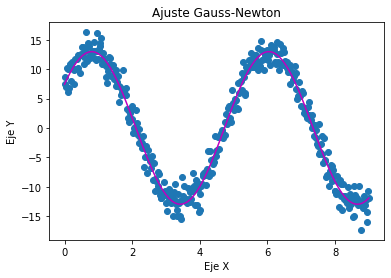

Número de filas: 400
f(z0): 40807.16289819636
No convergió.
zk: [ -0.1700118   23.21783424 -78.63302966]
f(zk): 18653.02330134146
||pk||: 2.032077004816657
k: 49999


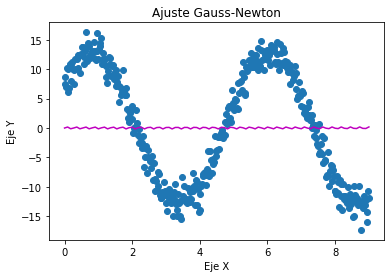

Número de filas: 400
f(z0): 37048.62007346928
Convergió.
zk: [  -0.19679603   52.28163675 -183.75409605]
f(zk): 18651.983776007288
||pk||: 1.1529286187877427e-08
k: 54


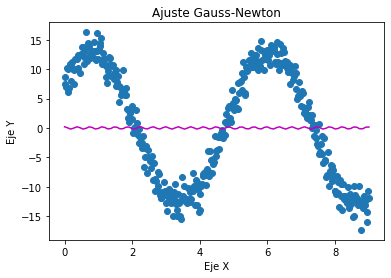

In [101]:
z0 = np.array([15, 0.6, 0])
z1 = np.array([15, 1, 0])
z2 = np.array([15, 0.6, 1.6])
eps = sys.float_info.epsilon
tol = eps**(1/2)

Probar("puntos2D_1.npy", R, J, z0, 50000, tol)
Probar("puntos2D_1.npy", R, J, z1, 50000, tol)
Probar("puntos2D_1.npy", R, J, z2, 50000, tol)

El ajuste con el valor inicial $z_0=(15,0.6,0)$ es muy bueno, la gráfica se ajusta de forma muy adecuada. La amplitud $A=15$ es muy asertada al ver los datos que se ajustan a una amplitud similar. Por ello es más fácil que converja, y vemos que el desplazamiento de la gráfica está dado por $0$ y la frecuecuencia angular por $0.6$. 

La función $seno$ creada con los otros valores iniciales, no se ajustan tan bien, a pesar de estar dde que estos valores están muy cerca al punto inicial. El vector resultante de $z_k$ nos devuelve valores que no ajustan una buena función y en un caso no converge.

## Ejercicio 2 (5 puntos)

Programar el método de Levenberg-Marquart para mínimos cuadrados.

Dar la función de residuales $R(z)$,
la función Jacobiana $J(z)$, un  punto inicial $z_0$, un número máximo de 
iteraciones $N$, $\mu_{ref}>0$ y la tolerancia $\tau>0$.

1. Hacer $res=0$ y construir la matriz identidad $I$ de tamaño igual a la dimensión de $z_0$.
2. Calcular $R_0 = R(z_0)$
3. Calcular $J_{0} = J(z_0)$
4. Calcular $f_0  = 0.5R_0^\top R_0$
5. Calcular $\mathbf{A}  = J_0^\top J_0$ y $\mathbf{g} = J_0^\top R_0$
6. Calcular $\mu = \min\{ \mu_{ref}, \max a_{ii} \}$, donde $a_{ii}$ son los 
   elementos de la diagonal de la matriz $\mathbf{A}$.
7. Para $k = 0, 1, ..., N$:

- Calcular $\mathbf{p}_k$ resolviendo el sistema

$$  (\mathbf{A}  + \mu \mathbf{I}) \mathbf{p}_k = -\mathbf{g} $$

- Si $\|\mathbf{p}_k\|<\tau$, hacer $res=1$ y  terminar el ciclo.
- Calcular $\mathbf{z}_{k+1} = \mathbf{z}_k + \mathbf{p}_k$ 

- Calcular $\mathbf{R}_{k+1} = \mathbf{R}(\mathbf{z}_{k+1})$
- Calcular $f_{k+1} = 0.5\mathbf{R}_{k+1}^\top \mathbf{R}_{k+1}$

- Calcular el parámetro $\rho$ (ver las notas de la clase 16)

$$\rho = (f_k - f_{k+1})/(q_k(\mathbf{x}_k) - q_k(\mathbf{x}_{k+1})) = 
  (f_k - f_{k+1})/(-\mathbf{p}_k^\top \mathbf{g} + 0.5\mu_k \mathbf{p}_k^\top \mathbf{p}_k ) $$ 
  
- Si $\rho<0.25$, hacer $\mu = 2\mu$.
- Si $\rho>0.75$, hacer $\mu = \mu/3$.
- Calcular $\mathbf{J}_{k+1}    = \mathbf{J}(\mathbf{z}_{k+1})$
- Calcular $\mathbf{A} = \mathbf{J}_{k+1}^\top \mathbf{J}_{k+1}\;$ y 
  $\;\mathbf{g} = \mathbf{J}_{k+1}^\top \mathbf{R}_{k+1}$.

8. Devolver el punto $\mathbf{z}_k$, $f_k$, $k$ y $res$.


---

1. Escriba una función que implementa el algoritmo anterior 
   usando arreglos de Numpy. 
   
2. Aplique este algoritmo para resolver el problema del Ejercicio 1,
   imprimiendo la misma información y generando la gráfica correspondiente, 
   usando $\tau   = \sqrt{\epsilon_m}, N=5000, \mu_{ref}  = 0.001$
   y los tres puntos iniciales 
   
$$\mathbf{z}_0 = (15, 0.6, 0)$$
$$\mathbf{z}_0 = (15, 1.0, 0)$$
$$\mathbf{z}_0 = (15, 0.6, 1.6)$$



### Solución:

In [102]:
# En esta celda puede poner el código de las funciones
# o poner la instrucción para importarlas de un archivo .py

def LevenbergMarquart(R, J, z0, paramf, N, muref, tol):
    res = 0
    n = z0.size
    I = np.identity(n)
    zk = z0
    Rk = R(zk, paramf)
    Jk = J(zk, paramf)
    fk = 0.5*Rk.T@Rk
    A = Jk.T@Jk
    g = Jk.T@Rk
    maxdiag = np.max(np.diag(A))
    mu = np.min(np.array([muref, maxdiag]))
    for k in range(N):
        pk = np.linalg.solve(A+mu*I, -g)
        norm = LA.norm(pk)
        if norm < tol:
            res = 1
            break
        else:
            zk = zk + pk
            Rk = R(zk, paramf)
            fk1 = 0.5*Rk.T@Rk     #ρ=(fk−fk+1)/(qk(xk)−qk(xk+1))=(fk−fk+1)/(−p⊤kg+0.5μkp⊤kpk)
            rho = (fk - fk1)/(-pk.T@g+0.5*mu*pk.T@pk) #revisa esto fk+1
            if rho<0.25:
                mu = 2*mu
            elif rho>0.75:
                mu = mu/3
            Jk = J(zk, paramf)
            A = Jk.T@Jk
            g = Jk.T@Rk
    return zk, fk, k, norm, res

In [103]:
# Pruebas realizadas a la función de residuales del Ejercicio 1


def ReadDataAndAdjust(archivo, zk):
    datos = np.load(archivo)
    x = np.array([m[0] for m in datos])
    y = np.array([m[1] for m in datos])
    min = x.min()
    max = x.max()
    z = np.linspace(min, max, 100)
    pz = zk[0]*np.sin(zk[1]*z+zk[2])
    plt.plot(z, pz, color ='m')
    plt.scatter(x, y)
    plt.title('Ajuste Levenberg-Marquart')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

def Probar1(archivo_A, R, J, z0, N, tol, muref):
    paramf = np.load(archivo_A)
    r = paramf.shape[0]
    print('Número de filas:',r)
    fz0 = 0.5*R(z0, paramf).T@R(z0, paramf)
    print('f(z0):', fz0)    
    zk, fk, k, norm, res = LevenbergMarquart(R, J, z0, paramf, N, muref, tol)
    if res == 1:
        print('Convergió.')
    else:
        print('No convergió.')
    print('zk:', zk)
    print('f(zk):', 0.5*R(zk, paramf).T@R(zk, paramf))
    print('||pk||:', norm)
    print('k:', k)
    ReadDataAndAdjust(archivo_A, zk)


Número de filas: 400
f(z0): 45454.05280978729
Convergió.
zk: [12.99606648  1.19935917 -5.67317097]
f(zk): 457.16936121307225
||pk||: 1.4553292355606329e-08
k: 8


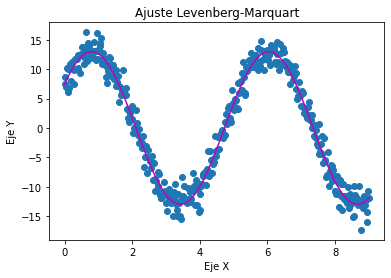

Número de filas: 400
f(z0): 40807.16289819636
Convergió.
zk: [ 1.61566084e-01  4.65280277e+02 -9.72682853e+02]
f(zk): 18653.24681633547
||pk||: 1.468800314782099e-08
k: 102


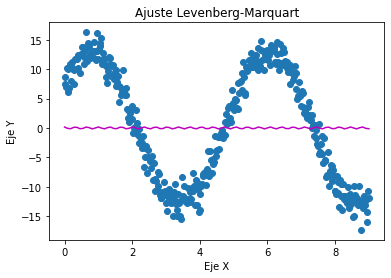

Número de filas: 400
f(z0): 37048.62007346928
Convergió.
zk: [ 2.44561555e-01 -1.44795531e+02  5.32641064e+02]
f(zk): 18649.91450095571
||pk||: 1.1965860981504653e-08
k: 56


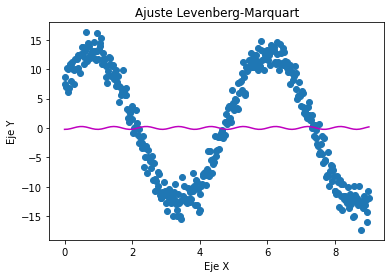

In [104]:
z0 = np.array([15, 0.6, 0])
z1 = np.array([15, 1, 0])
z2 = np.array([15, 0.6, 1.6])
eps = sys.float_info.epsilon
tol = eps**(1/2)

Probar1("puntos2D_1.npy", R, J, z0, 50000, tol, 0.001)
Probar1("puntos2D_1.npy", R, J, z1, 50000, tol, 0.001)
Probar1("puntos2D_1.npy", R, J, z2, 50000, tol, 0.001)

El ajuste con el valor inicial $z_0=(15,0.6,0)$ es muy bueno, la gráfica se ajusta de forma muy adecuada. La amplitud $A=15$ es muy asertada al ver los datos que se ajustan a una amplitud similar. Por ello es más fácil que converja, y vemos que el desplazamiento de la gráfica está dado por $0$ y la frecuecuencia angular por $0.6$. 

La función $seno$ creada con los otros valores iniciales, no se ajustan tan bien, a pesar de estar dde que estos valores están muy cerca al punto inicial. El vector resultante de $z_k$ nos devuelve valores que no ajustan una buena función y en un caso no converge.